# Measurements

In diesem Datensatz haben wir es mit einer Vielzahl unterschiedlicher Maße zu tun. Zum einen wurden viele verschiedene Knochentypen vermessen, zum anderen wurden die einzelnen Knochentypen auch noch auf verschiedene Weisen vermessen, was durch das Attribut 'MEASTYPE' angezeigt wird. Das bedeutet, dass selbst die Maße für den gleichen Knochentyp nicht unbedingt vergleichbar sind, weil z.B. manche Maße die Länge des Knochens, andere die Breite an einer bestimmten Stelle und wieder andere den Umfang angeben. Das bedeutet, dass bei der Auswertung nicht nur nach Knochentyp unterschieden werden muss, sondern innerhalb des Knochentyps auch noch mal nach 'MEASTYPE', um die Maße auch wirklich vergleichbar zu halten. Erst dann kann eine Entwicklung über die Zeit betrachtet werden.

In [1]:
import pandas as pd

import utils.load_write as lw
import utils.datastructure_operations as dataops

df_horse = lw.load_csv("data/csv/abmap_horse.csv")
measures_per_bone = df_horse.BONEID.value_counts()
#print(measures_per_bone)

print("Es liegen", len(df_horse.index) , "Maße von insgesamt", len(measures_per_bone), "Knochen vor.")
print("Jeder Datenpunkt hat", len(df_horse.columns), "Attribute:")
dataops.pretty_print(list(df_horse.columns))


Es liegen 3099 Maße von insgesamt 1038 Knochen vor.
Jeder Datenpunkt hat 17 Attribute:
[ 'BONEID', 'MEASURE', 'MEASTYPE', 'SPECIES', 'ELEMENT', 'SIDE', 'COMMENTS',
  'CONTEXT', 'PERIOD', 'CDATE', 'RANGE', 'PHASE', 'SITECODE', 'SITE', 'COUNTY',
  'GRIDREF', 'REFERENCE']


Zuerst gruppieren wir also die Daten nach Knochentyp, weil wir nur innerhalb dieser Gruppen valide Vergleiche machen können.

Die einzelnen Knochentypen wurden gruppiert und die Zeitperioden jeweils so aktualisiert, dass wir nur noch mit unseren zuvor festgelegt vier gröberen Intervallen arbeiten.
Ein Problem ist jedoch, dass die verfügbaren Maße für die einzelnen Knochentypen nicht alle dieselbe Dimension haben (z.B. "Länge"). Beim Vermessen von Knochen gibt es einen Haufen verschiedener Maße (s. z.B. Levine1981). Um zu sehen, ob sich die Größe eines Knochens über die Zeit verändert hat, müssen wir also alle Maße einzeln vergleichen (also die Längen untereinander vergleichen, die Breiten, die Umfänge etc.).
Hierbei wird jedoch schnell offensichtlich, dass die vergleichbare Datenmenge plötzlich sehr klein wird und kaum noch für eine aussagekräftige Statistik genutzt werden kann.
Der Versuch, statt aller verfügbarer Pferdeknochen beispielsweise alle Knochen desselben Typs einer Tierart zu untersuchen, die viel mehr Funde vorweisen kann, scheitert leider daran, dass die Datenbank des ABMAP-Projekts momentan nicht verfügbar ist (SCREENSHOT). Wir müssen also mit den - vergleichsweise wenigen - Pferdeknochen arbeiten.

Zunächst wollen wir also herausfinden, mit welchen und wie vielen verschiedenen Maß-Dimensionen wir es hier zu tun haben und was sie bedeuten - ggf. kann man sie zusammenfassen. Dazu zählen wir zuerst, wie viele verschiedene Dimensionen pro Knochentyp vorliegen:

In [2]:
element_grp = df_horse.groupby(['ELEMENT'])
df_element_meastype = element_grp['MEASTYPE'].value_counts().to_frame(name='COUNT').reset_index()
df_element_meastype

,ELEMENT,MEASTYPE,COUNT
0,Astragalus,GB,65
1,Astragalus,GH,60
2,Astragalus,BFd,51
3,Astragalus,LmT,51
4,Astragalus,Lm,1
5,Calcaneum,GB,24
6,Calcaneum,GL,22
7,Femur,DC,24
8,Femur,SD,24
9,Femur,Bd,23


Anschließend fügen wir die entsprechenden Erklärungen für die Dimensionen in die Tabelle ein, um eine bessere Übersicht zu bekommen, welche Dimensionen sich ggf. zusammenfassen lassen. Diesen Dataframe speichern wir als Tabelle ab, um ihn besser lesen zu können:

In [3]:
df_meastypes = lw.load_csv("data/csv/meastype.csv")
df_element_meastype['EXPLANATION'] = pd.Series(dtype='string')
for code, explanation in zip(df_meastypes.Code, df_meastypes.Measurement):
    filt = (df_element_meastype['MEASTYPE'] == code)
    df_element_meastype.loc[filt, 'EXPLANATION'] = explanation

#lw.save_csv(df_element_meastype, "data/csv/bone-elements-w-meastype.csv")

Anscheinend ist das Zusammenfassen der Dimensionen aber nicht sinnvoll (s. Levine1981).
Also suchen wir uns stattdessen für jeden Knochentyp die vier häufigsten Dimensionen heraus und werten diese statistisch aus, um anschließend einen Vergleich über die vier Zeitperioden ziehen zu können.

In [4]:
relevant_bone_types = lw.load_json("data/json/relevant-bone-types.json")

for bone_type in relevant_bone_types:
    root = "data/csv/elements/"
    name = bone_type.lower().replace(" ","_")
    df_element = lw.load_csv(root + name + ".csv")
    dimensions_dict = dataops.dimensions_dict(df_element.groupby('MEASTYPE'))

    df_dimensions = pd.DataFrame(columns=['BONEID', 'MEASURE', 'MEASTYPE', 'PERIOD', 'RANGE'])

    ''' now find the 4 most common meastypes '''
    dimensions_dict = dataops.trim_dictionary(dimensions_dict, 4)
    for dimension in dimensions_dict:
        df_dimensions = pd.concat([df_dimensions, dimensions_dict[dimension]["df"]])

    ''' then save those to csv for further processing '''
    #lw.save_csv(df_dimensions, root + "meastypes/" + name + "_meastypes.csv")


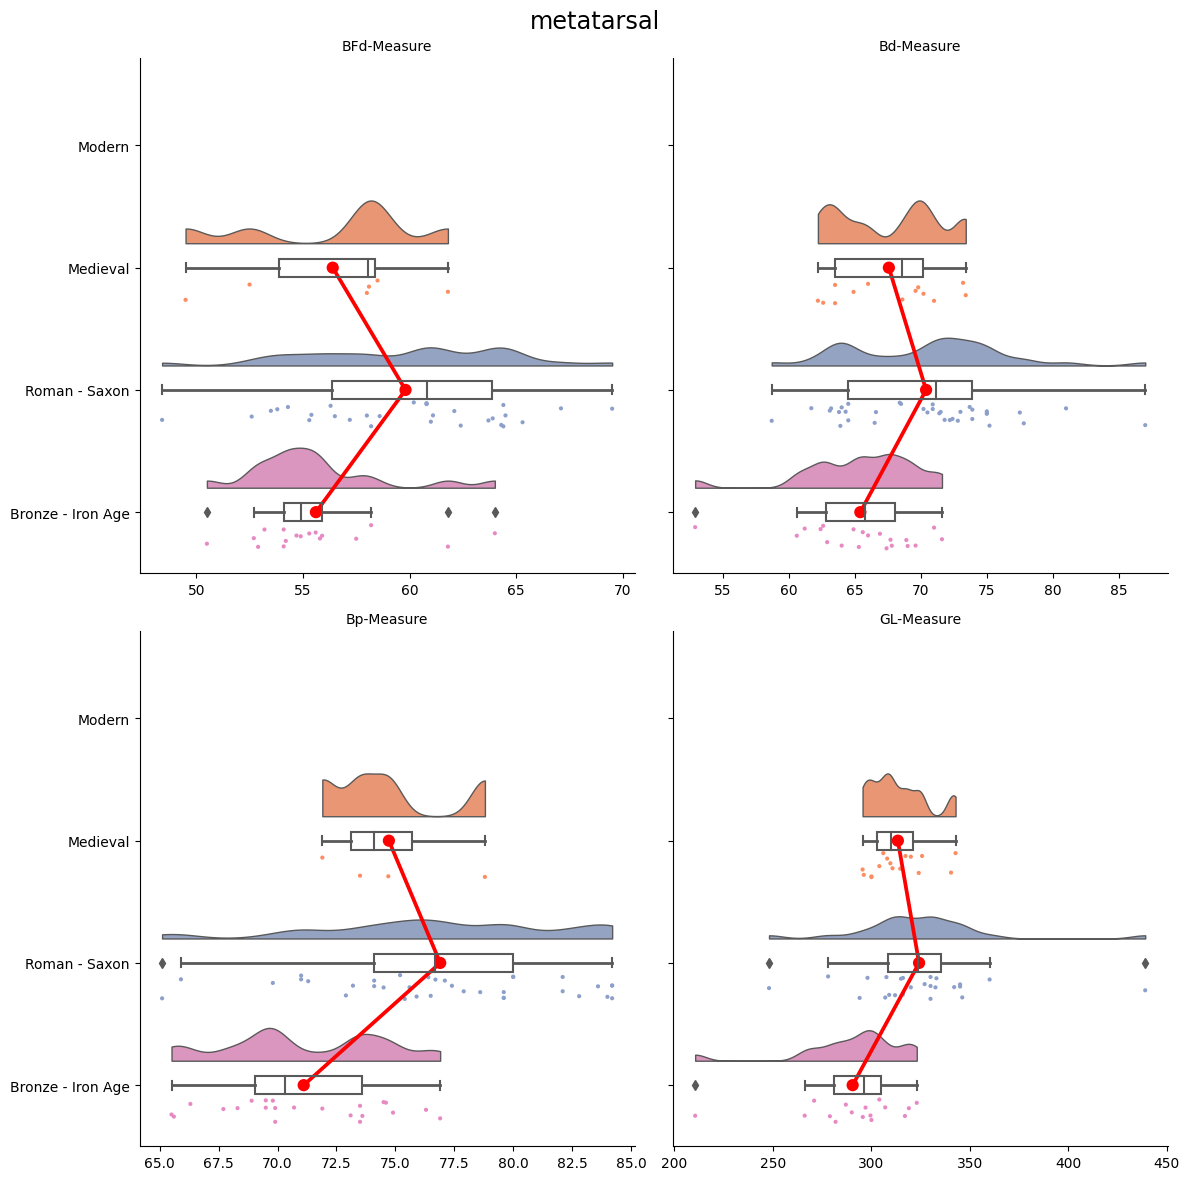

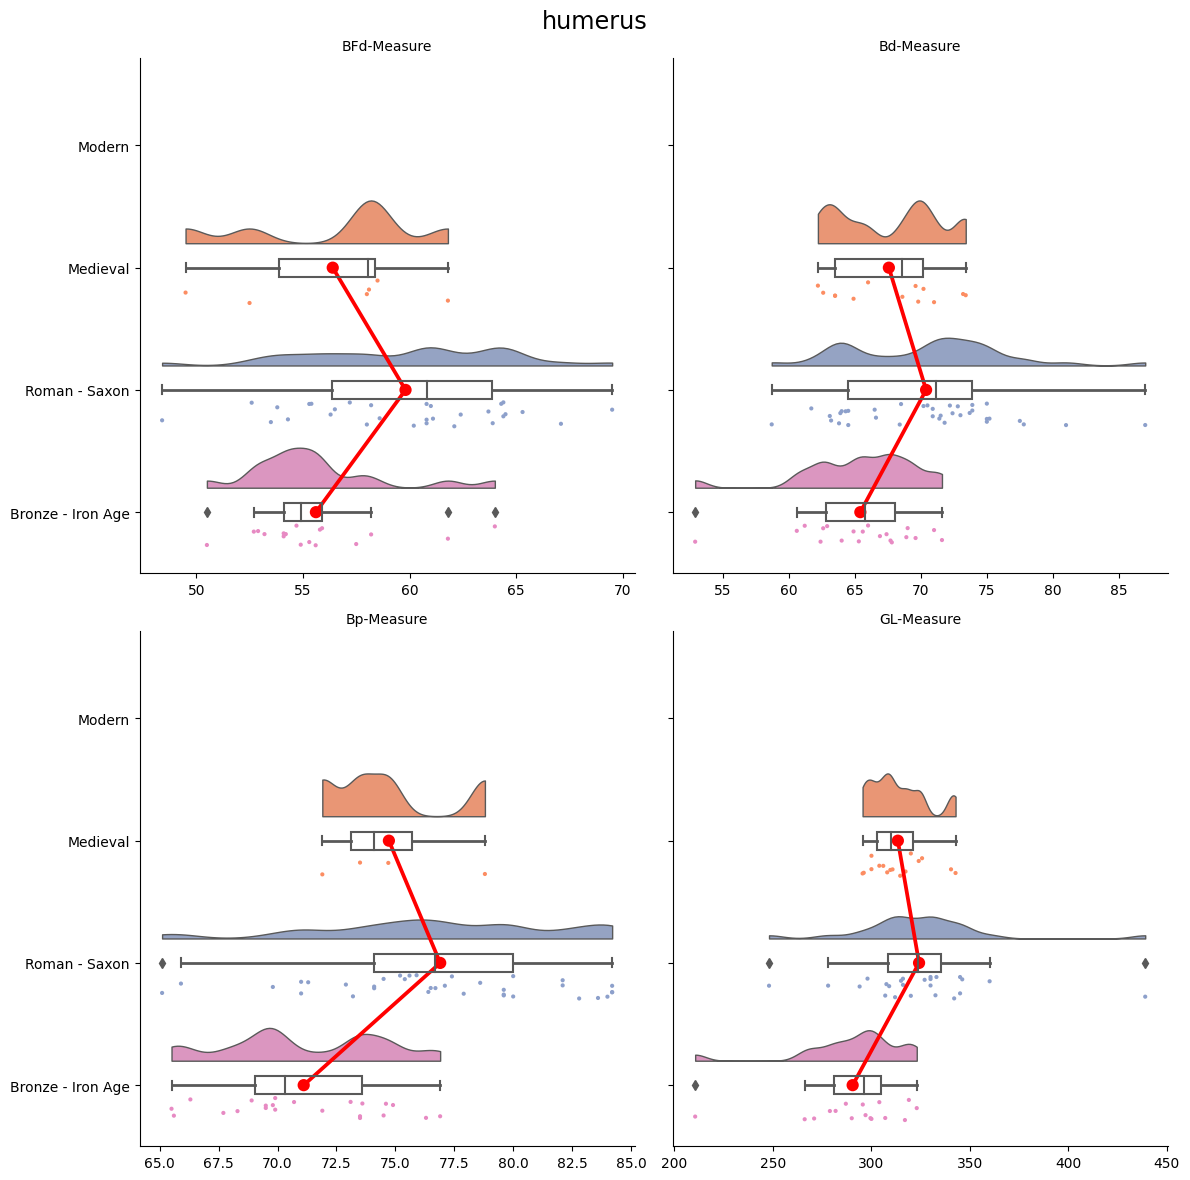

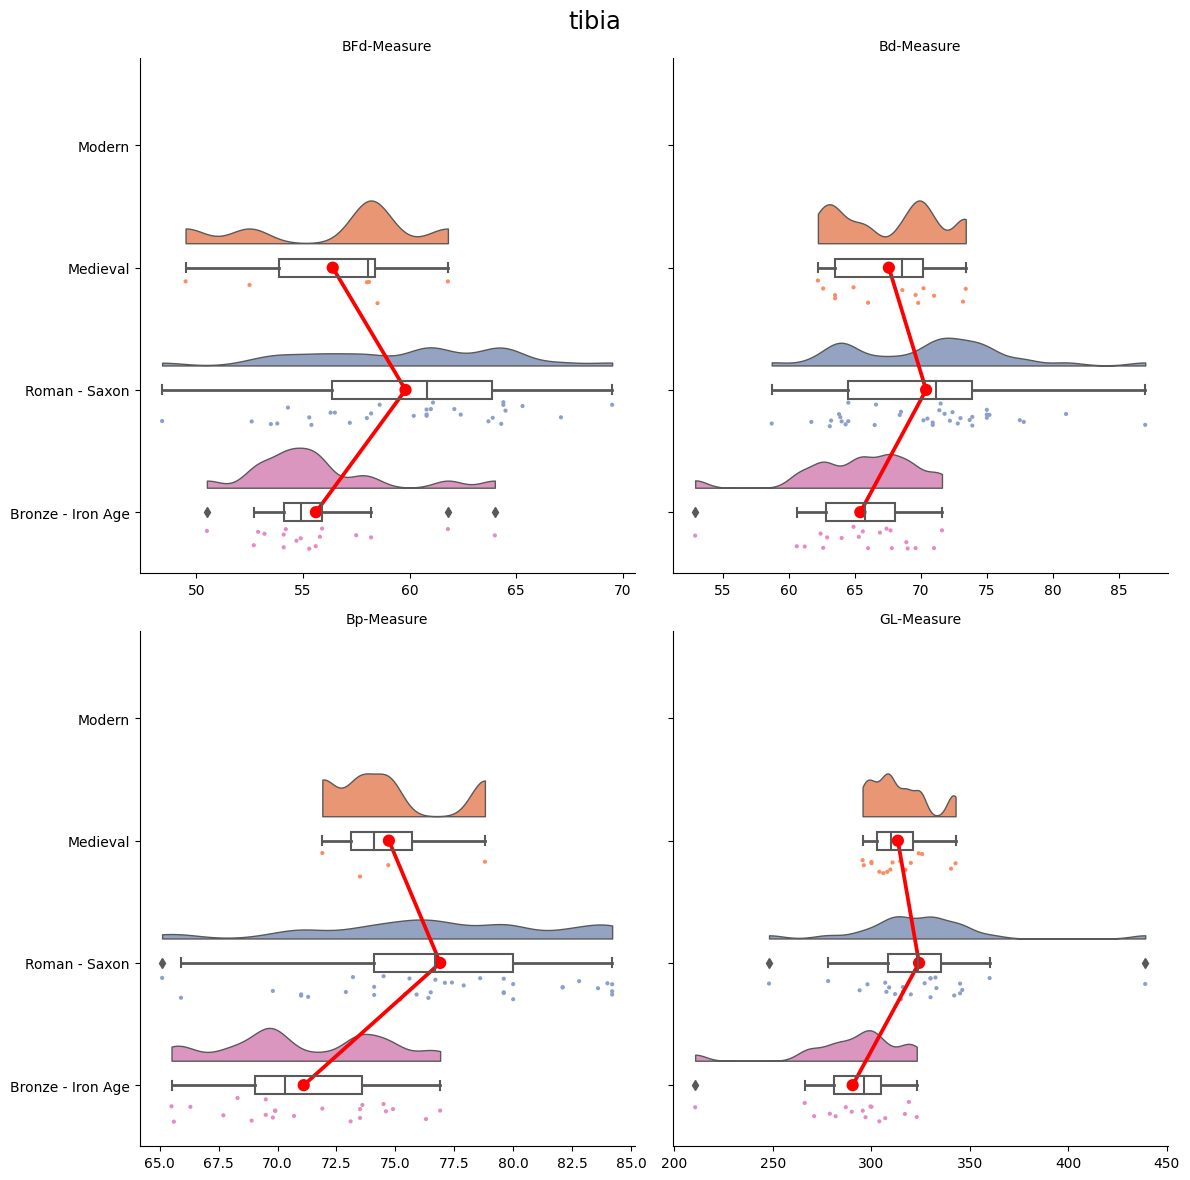

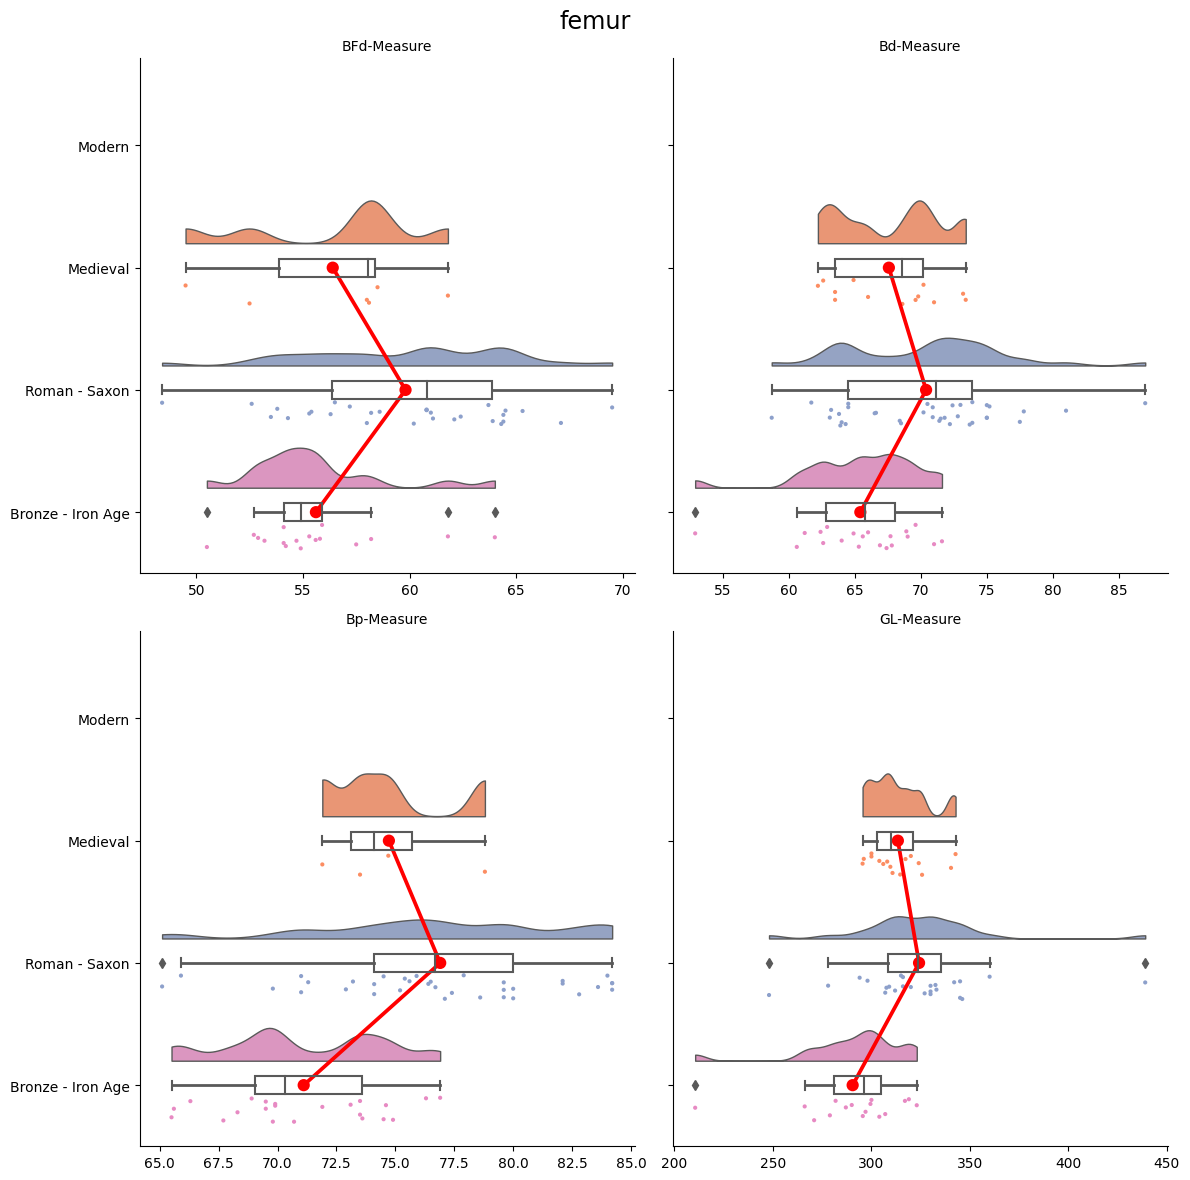

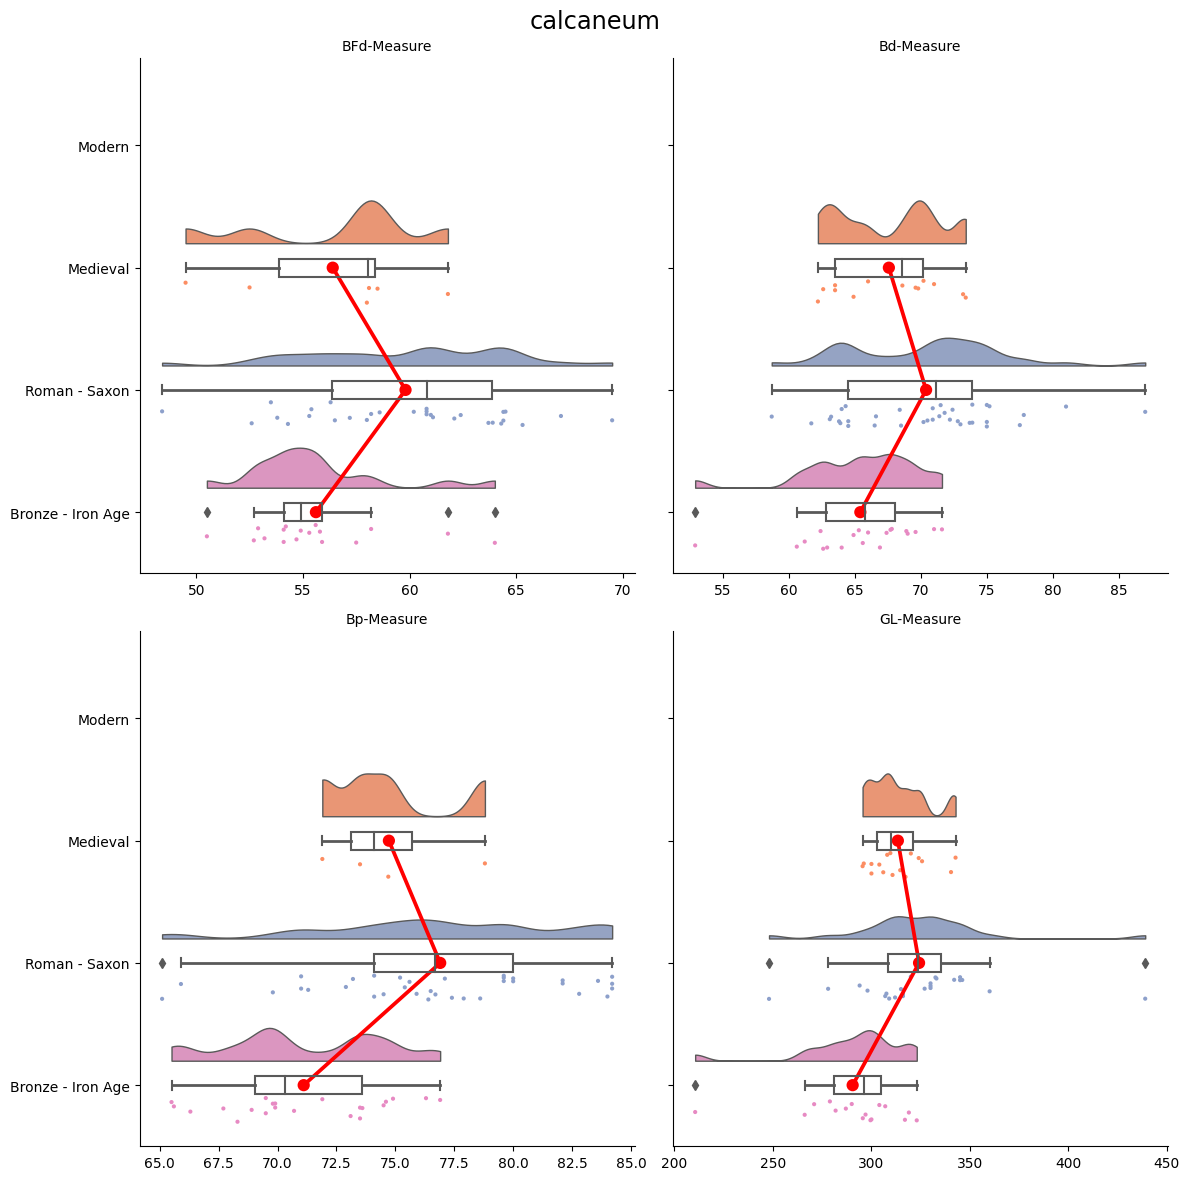

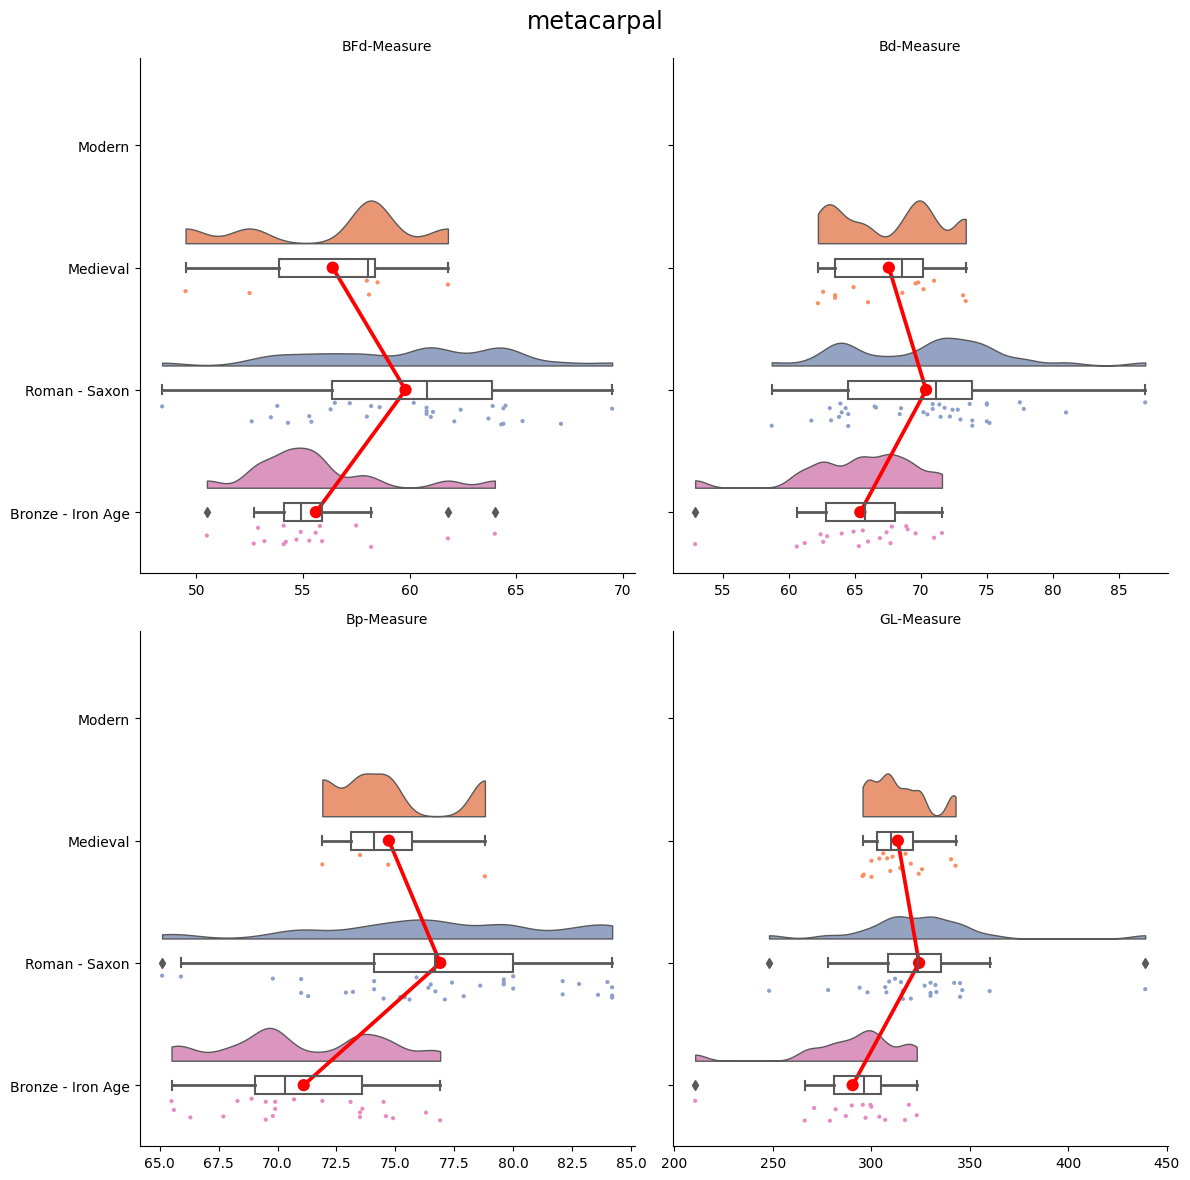

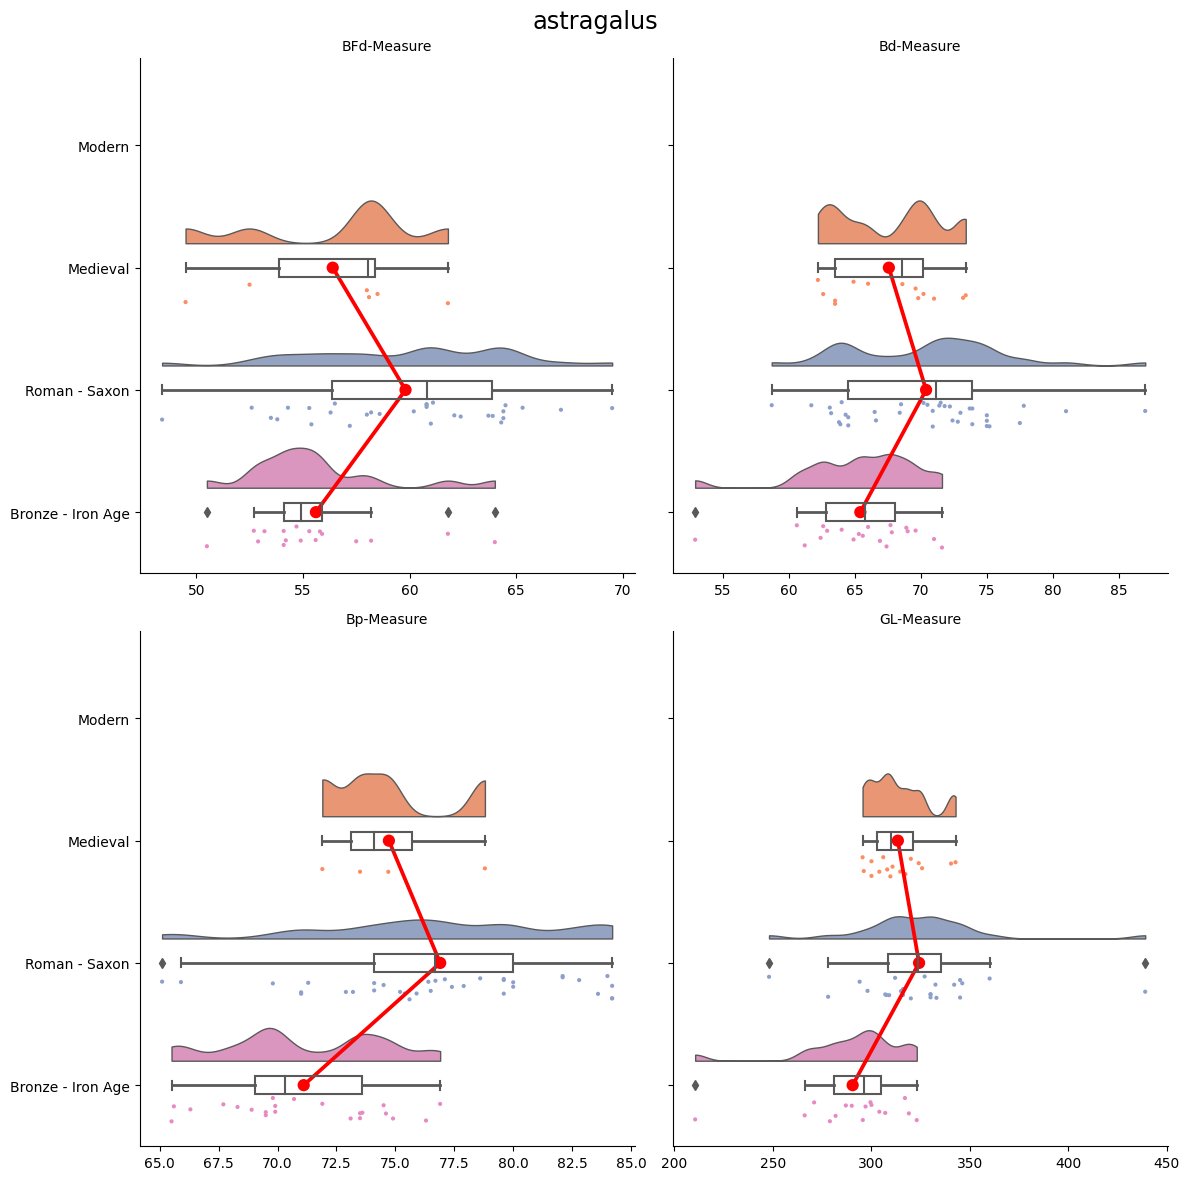

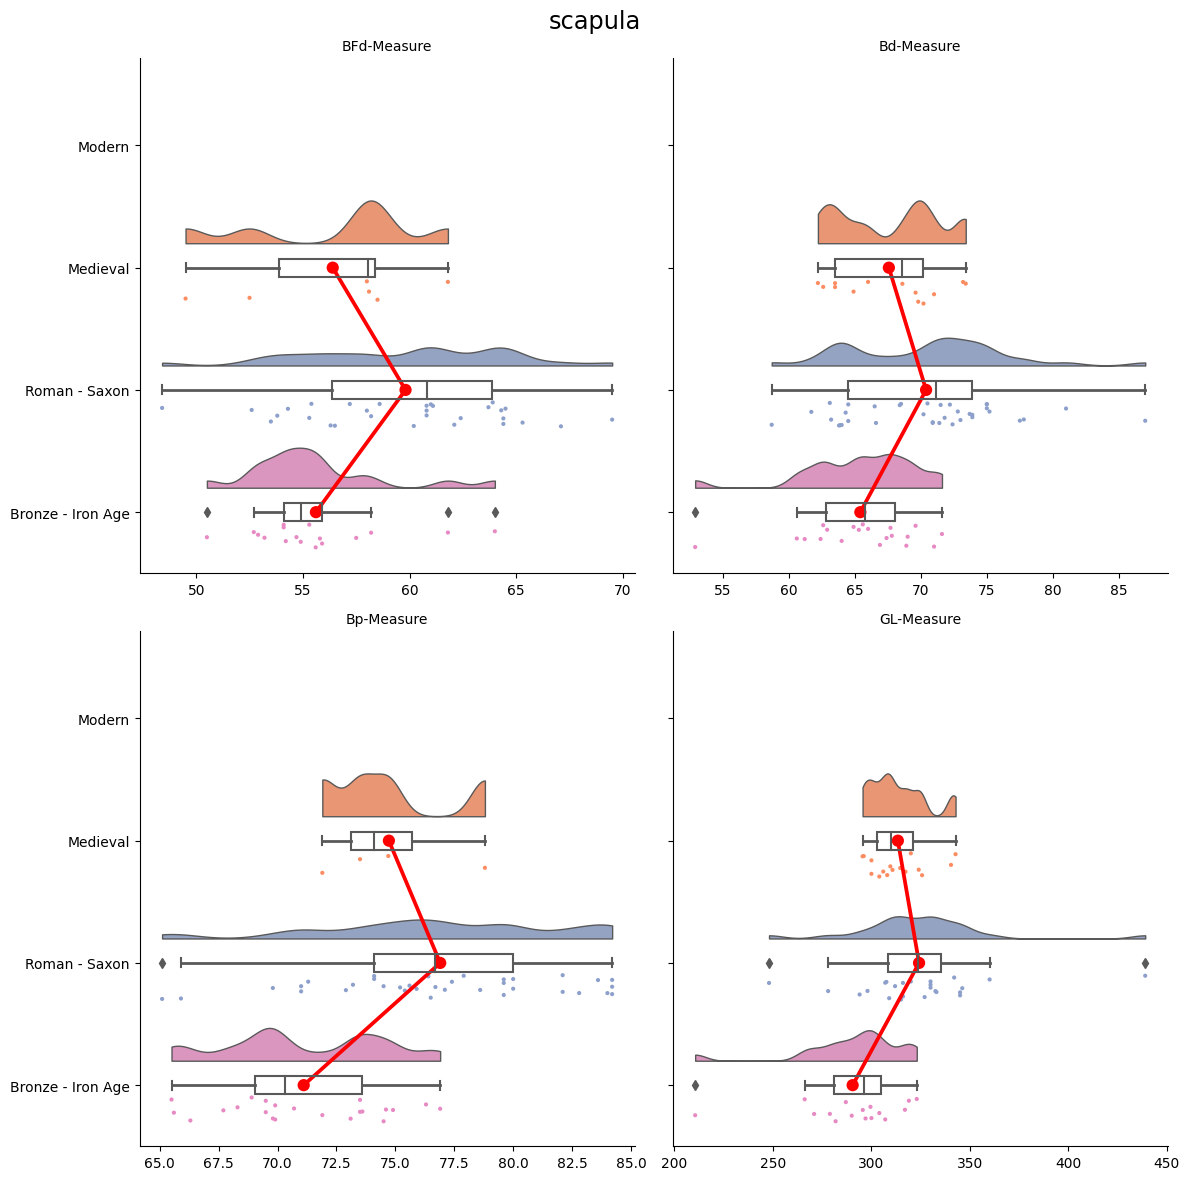

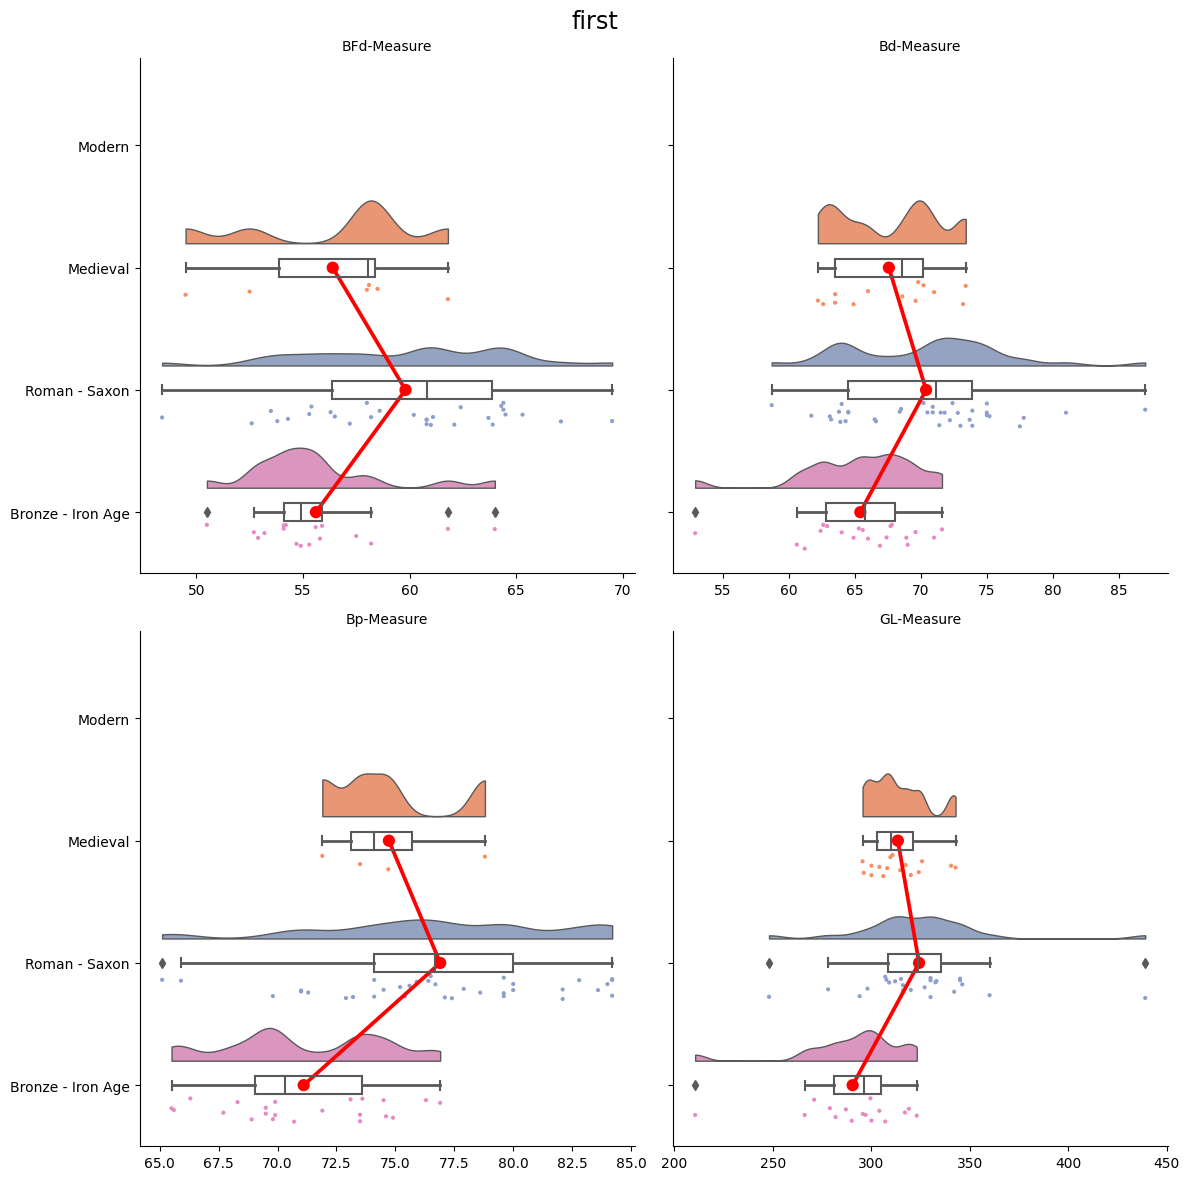

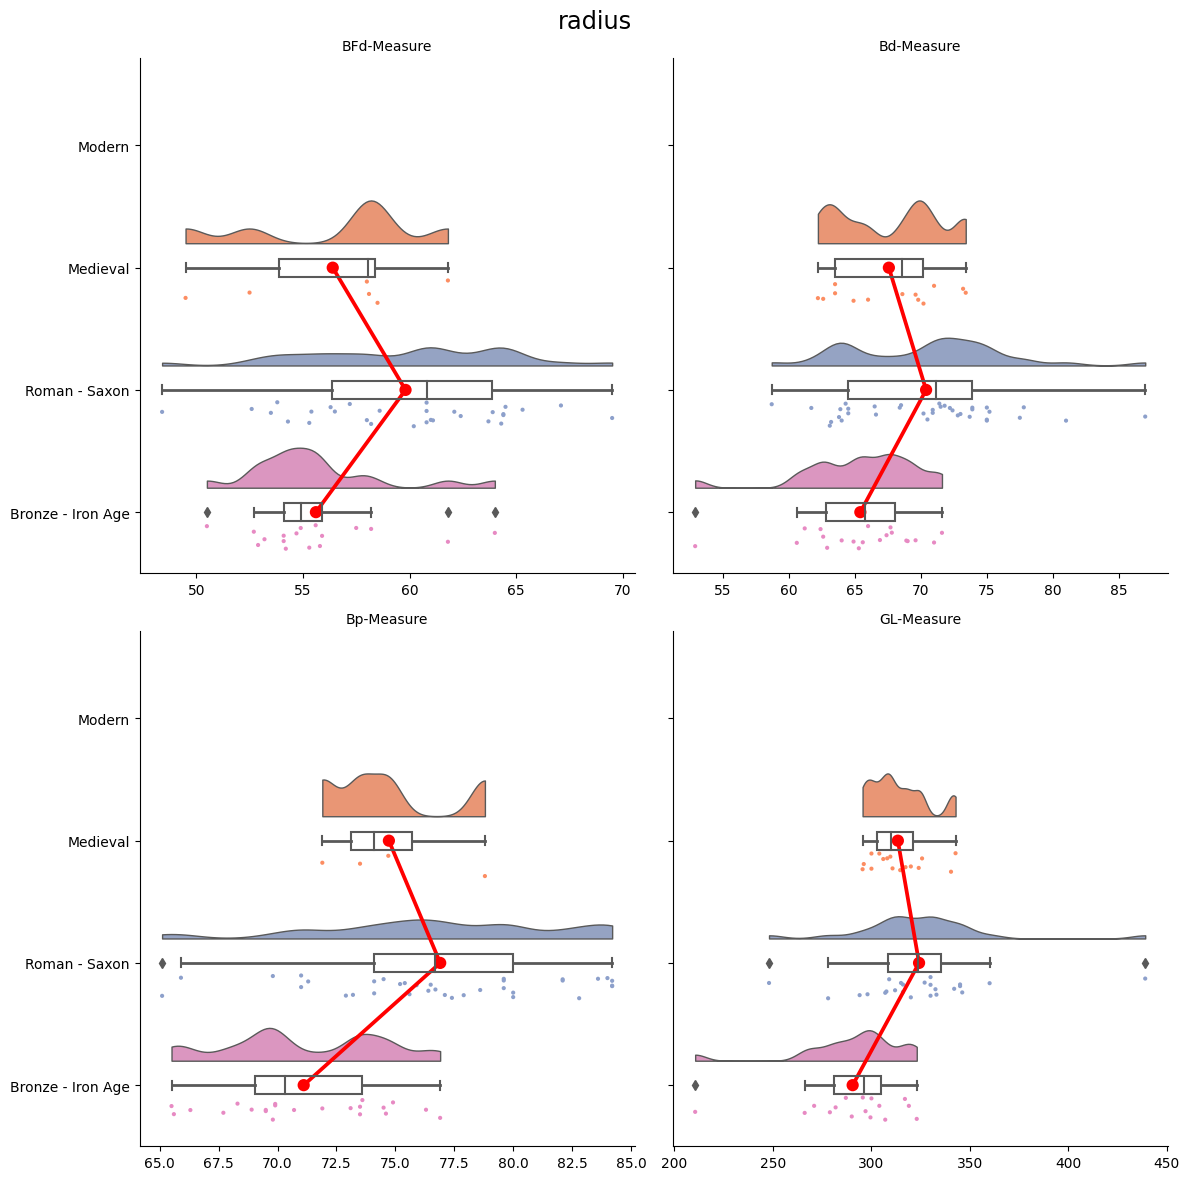

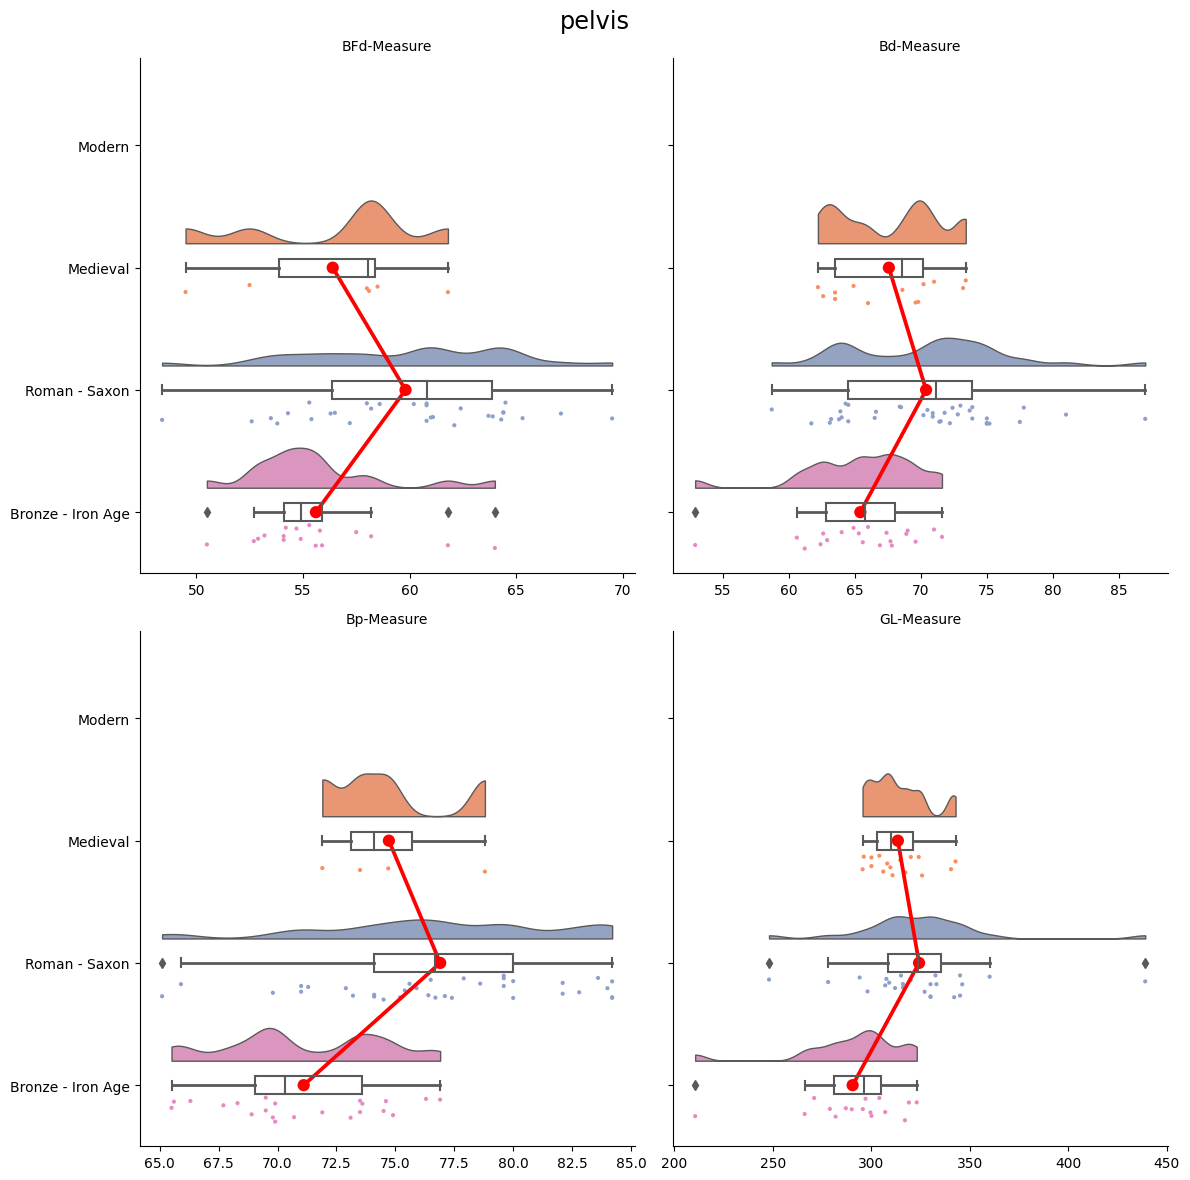

In [9]:
from utils import plotting
import os

directory = os.fsencode("data/csv/elements/meastypes/")

for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith("_meastypes.csv"):
        bone_type = filename.split("_")[0]
        df = lw.load_csv("data/csv/elements/meastypes/radius_meastypes.csv")
        plotting.raincloud_plot(df, bone_type)